In [78]:
import pandas as pd
import geopandas as gpd

data=pd.read_csv('./data/fishnet.csv')
fishnet=gpd.read_file('./data/fishnet_.shp')
data=data.fillna(0)
data.head()

,OID_,公交车站,公司,公司企业,公园,加油站,医疗,娱乐设施,居民小区,教育,...,通讯服务,酒店宾馆,金融服务,风景,餐饮,SUM_Morn,SUM_Noon,SUM_Even,POINT_X,POINT_Y
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.473135,45.639257
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.476777,45.639257
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.480419,45.639257
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.484061,45.639257
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.487703,45.639257


In [79]:
data['公共设施类']=data['公交车站']+data['公园']+data['医疗']+data['教育']+data['风景']
data['商业服务类']=data['公司']+data['公司企业']+data['加油站']+data['娱乐设施']+data['汽车服务']+data['购物']+data['通讯服务']+data['酒店宾馆']+data['金融服务']+data['餐饮']
data['居民社区类']=data['居民小区']
data['交通服务类']=data['公交车站']+data['加油站']+data['汽车服务']
zone=data[['公共设施类','商业服务类','居民社区类','交通服务类','POINT_X','POINT_Y','SUM_Morn']]

In [80]:
import libpysal as ps
import numpy as np
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

# 因变量
g_y = zone['SUM_Morn'].values.reshape((-1,1))
 
# 自变量
g_X = zone[['公共设施类','商业服务类','居民社区类','交通服务类']].values
 
# 坐标信息Latitude	Longitud
u = zone['POINT_X']
v = zone['POINT_Y']
g_coords = np.array(list(zip(u,v)))
 
# z标准化
g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)
g_y = g_y.reshape((-1,1))
g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

In [81]:
# # 带宽选择函数
# gwr_selector = Sel_BW(g_coords, g_y, g_X)
# gwr_bw = gwr_selector.search(bw_min=900)
# print('最佳带宽大小为：',gwr_bw)

In [82]:
# GWR拟合
gwr_bw=900
model = GWR(g_coords, g_y, g_X, gwr_bw)
gwr_results = model.fit()
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                               10000
Number of covariates:                                                     5

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           6871.388
Log-likelihood:                                                  -12313.290
AIC:                                                              24636.581
AICc:                                                             24638.589
BIC:                                                             -85185.964
R2:                                                                   0.313
Adj. R2:                                                              0.313

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

<AxesSubplot:>

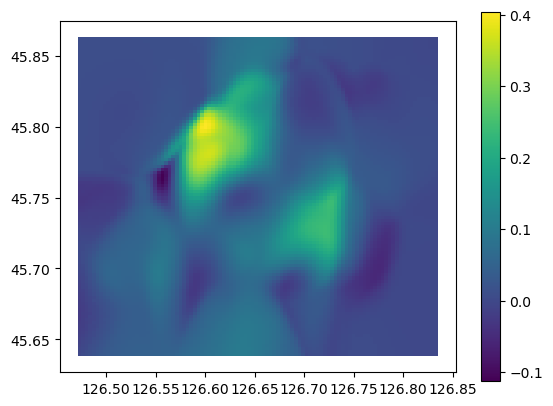

In [83]:
各个
fishnet['公共设施类']=gwr_results.params[:, 1]

fishnet.plot('公共设施类',legend = True)

<AxesSubplot:>

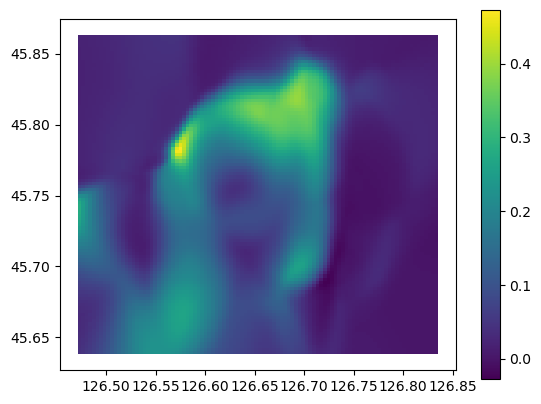

In [84]:
fishnet['商业服务类']=gwr_results.params[:, 2]

fishnet.plot('商业服务类',legend = True)

<AxesSubplot:>

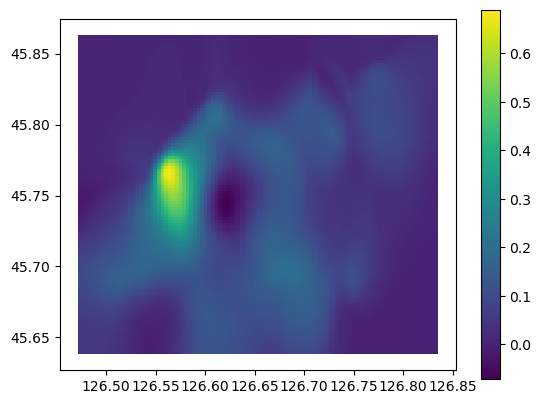

In [85]:
fishnet['居民社区类']=gwr_results.params[:, 3]

fishnet.plot('居民社区类',legend = True)

<AxesSubplot:>

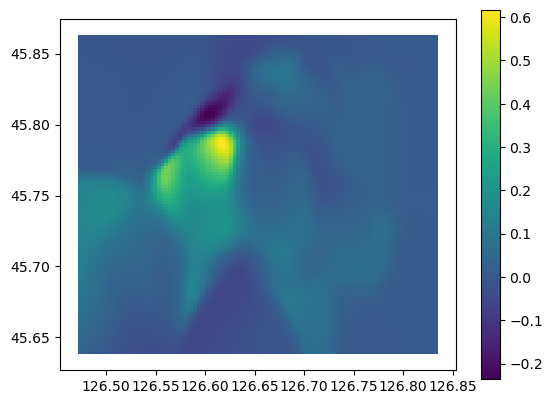

In [86]:
fishnet['交通服务类']=gwr_results.params[:, 4]

fishnet.plot('交通服务类',legend = True)